## PART A

## Import the libraries and the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
wine=datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)

In [4]:
X = pd.DataFrame((df_wine.values), columns = wine.feature_names)
y = wine.target
X_val = np.array(X)

In [5]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Visualize the Data

### Exploratory Data Analysis

#### Statistical Data

In [6]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Correlation Matrix

In [7]:
corr=df_wine.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### Heat Map using the correlation matrix

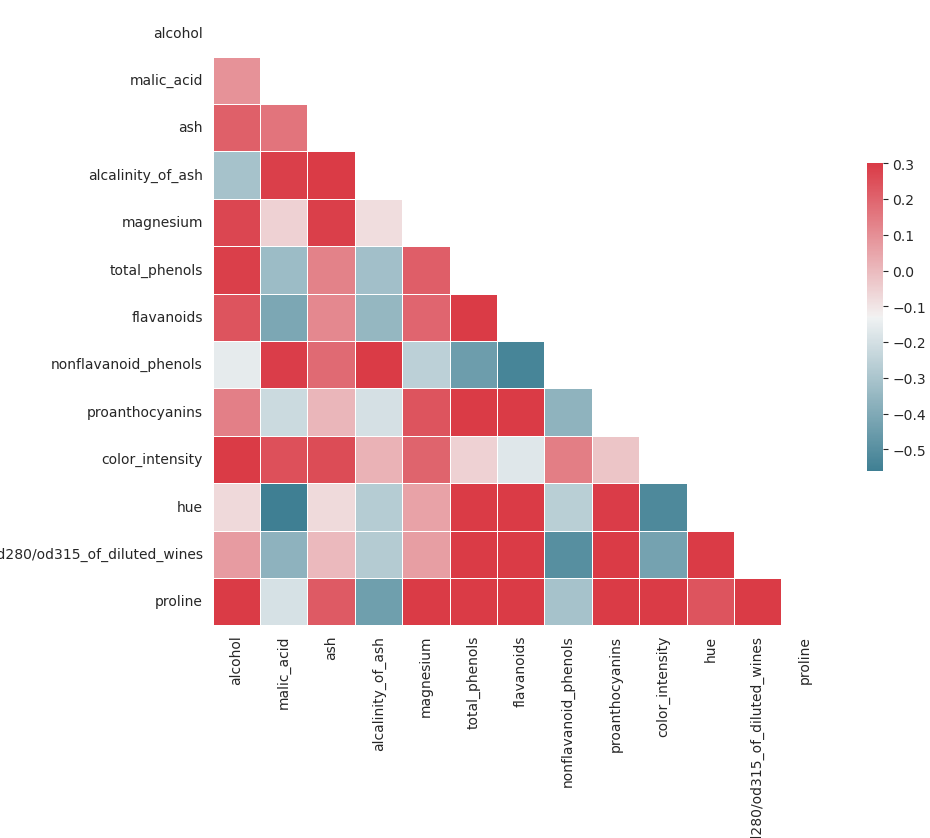

In [8]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### 
We use a scatter plot to visualize the data and understand some of the properties of the problem at hand.
We create a grid to show the interaction between 2 features.

In [9]:
def myplotGrid(X,y):
    X['target']=y
    pairplot_fig = sns.pairplot(X, hue = "target" , markers=['o','s','d'])
    del X['target']
    pairplot_fig.savefig("1.pdf", bbox_inches='tight')
    return

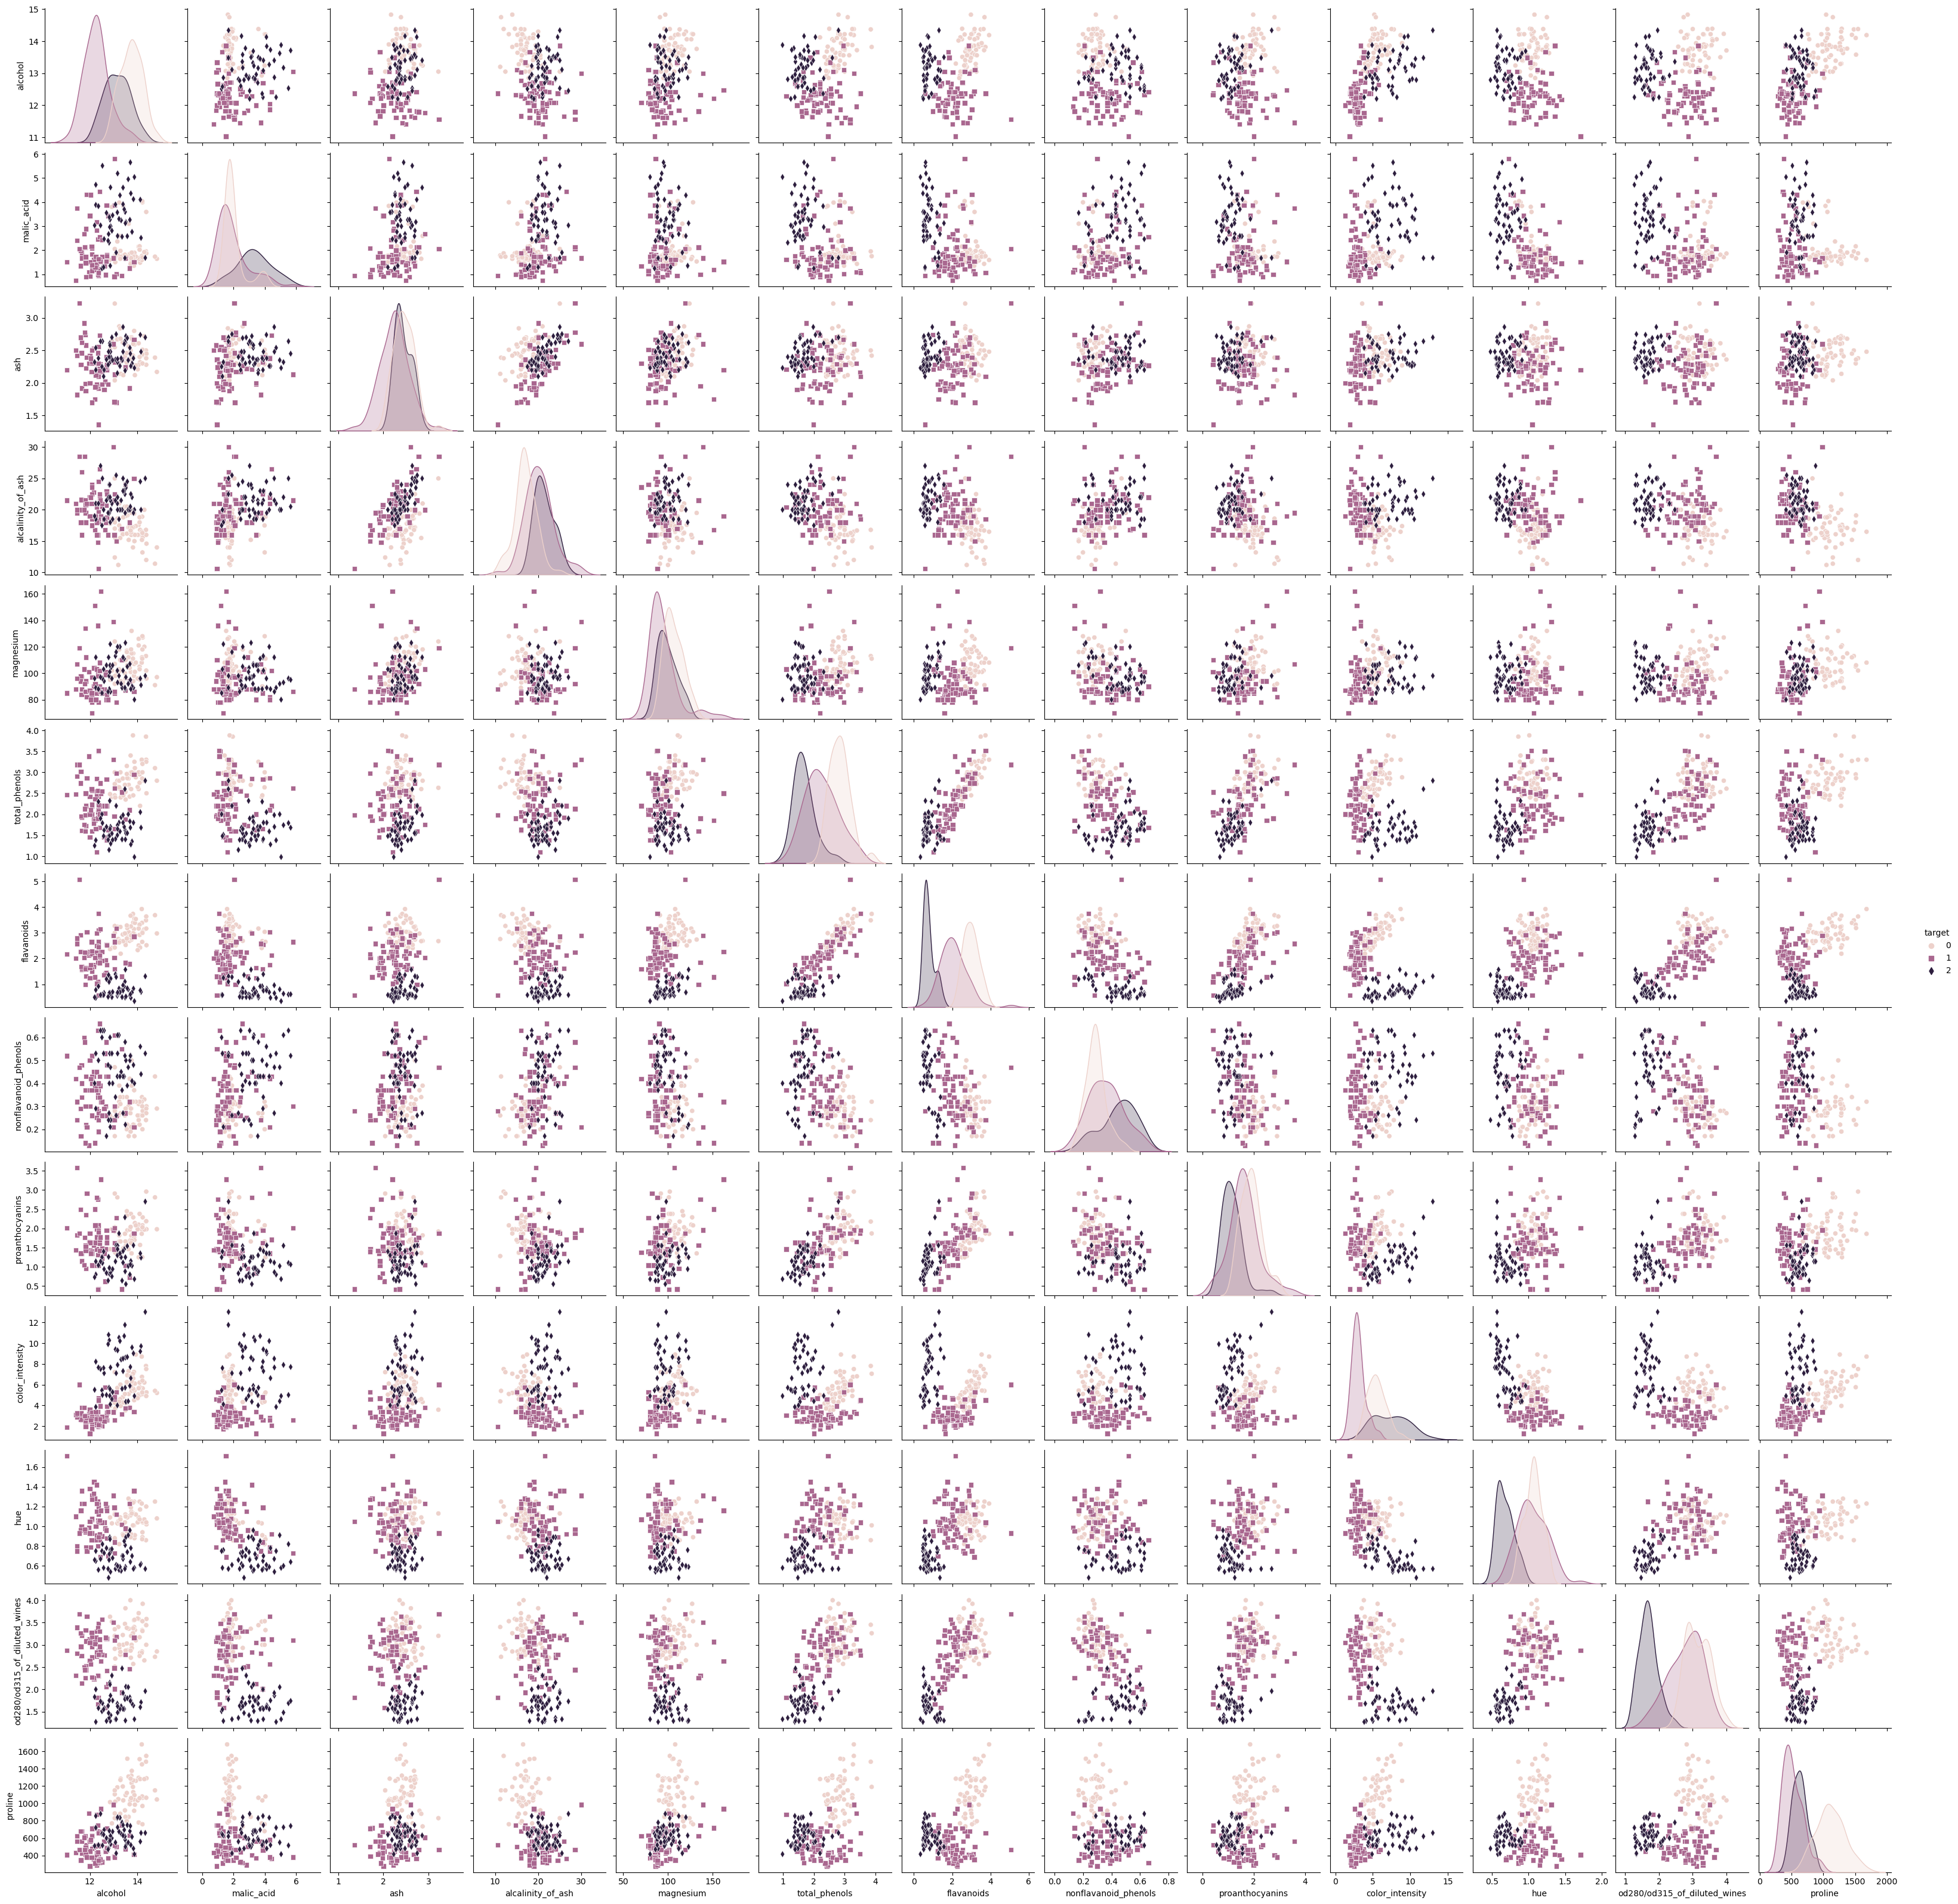

In [10]:
myplotGrid(X,y)

In [11]:
selected_features = ['alcohol','flavanoids','color_intensity','ash']
X1 = pd.DataFrame((df_wine[selected_features].values), columns = (selected_features))
y1 = wine.target


In [12]:
def myplotGrid(X,y):
    X1['target']=y1
    pairplot_fig = sns.pairplot(X1, hue = "target" , markers=['o','s','d'])
    del X1['target']
    pairplot_fig.savefig("2.pdf", bbox_inches='tight')
    return

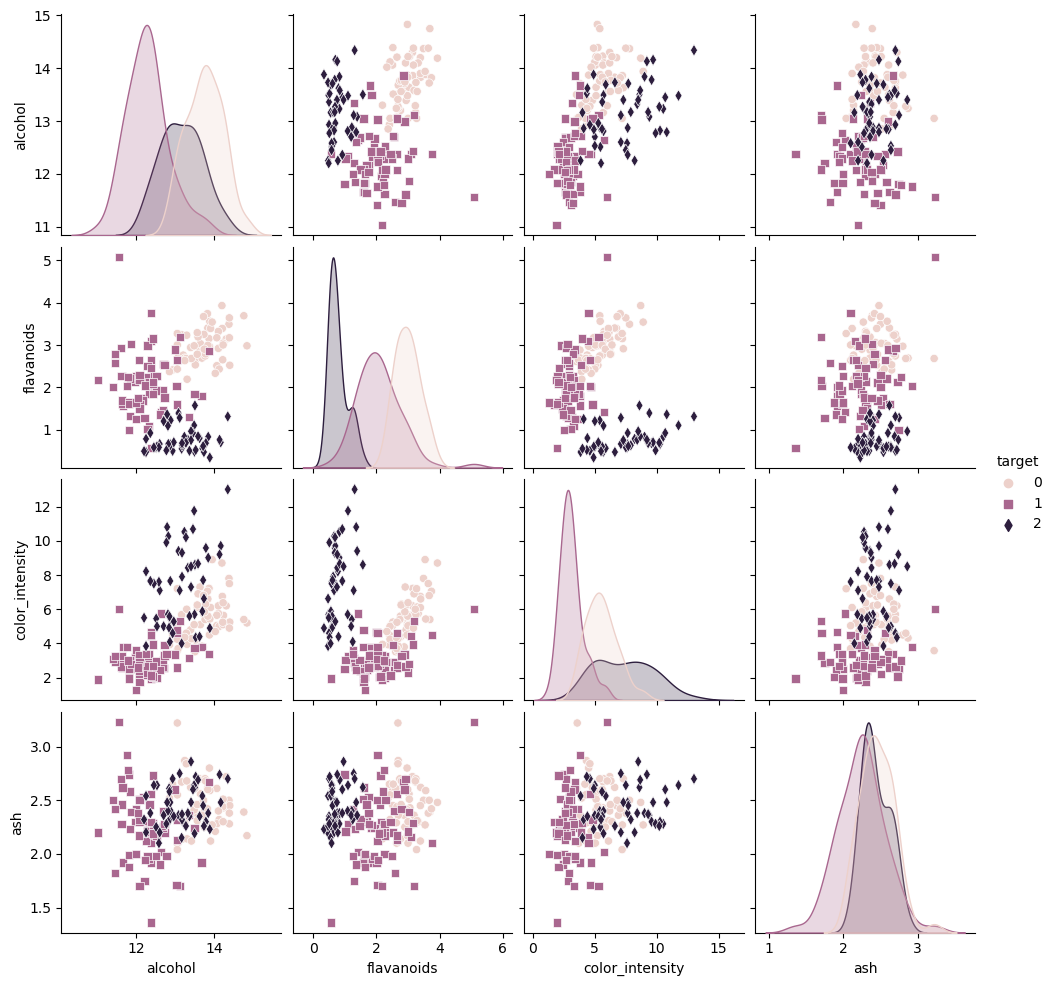

In [13]:
myplotGrid(X,y)

## kNN Implementation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_val, y, test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [15]:
print(y_test)

[0 2 1 1 2 0 0 0 0 1 1 2 2 0 0 1 0 2 1 2 0 0 2 0 1 0 1 0 0 1 2 1 0 1 0 2]


In [16]:
print(y_pred)

[1 1 1 2 2 0 0 0 2 2 2 2 2 0 0 0 0 2 1 2 0 0 0 0 1 0 1 0 0 2 2 2 0 1 0 2]


In [17]:
print("For data: \n", confusion_matrix(y_test,y_pred))

For data: 
 [[14  1  1]
 [ 1  5  5]
 [ 1  1  7]]


In [18]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.7222222222222222


In [19]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
params = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}
gs = GridSearchCV(model, params, cv = 5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

In [20]:
print('Best Accuracy: ', gs_results.best_score_)

Best Accuracy:  0.7470443349753694


In [21]:
print('Best Parametrs: ', gs_results.best_params_)

Best Parametrs:  {'n_neighbors': 9, 'weights': 'distance'}


## K fold Cross-Validation

In [22]:
knn = KNeighborsClassifier(n_neighbors=13,weights='distance')
scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [23]:
print(scores_knn) 

[0.66666667 0.86666667 0.64285714 0.78571429 0.85714286 0.71428571
 0.78571429 0.78571429 0.78571429 0.57142857]


In [24]:
print(scores_knn.mean())

0.7461904761904761


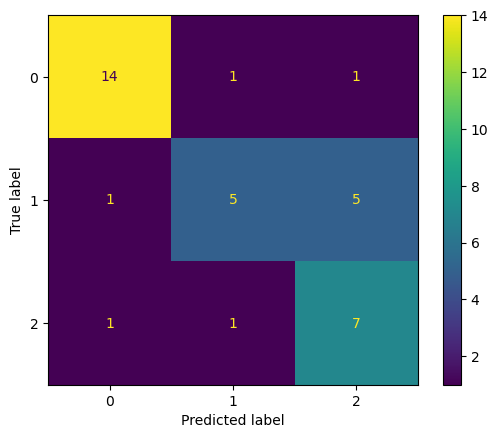

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [26]:
def CleanX(X):
    data=X.values
    return data[:,1:]

In [27]:
def Split(X,Y):
    print(Y)
    shuffler = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffler]
    Y_shuffled = Y[shuffler]
    print(Y_shuffled)
    split = int(0.8*X.shape[0])

    X_train = X_shuffled[:split,:]
    Y_train = Y_shuffled[:split]

    X_test = X_shuffled[split:,:]
    Y_test = Y_shuffled[split:]
    return X_train,Y_train,X_test,Y_test

In [28]:
def euclidian_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [29]:
def manhattan_dist(x1,x2):
    return np.abs(sum(x1-x2))

In [30]:
def kNN(X,Y,queryPoint,k,dist):
    vals = []
    m = X.shape[0]
    d=0
    for i in range(m):
        if dist == 0:
            d = euclidian_dist(queryPoint,X[i])
        elif dist==1:
            d = manhattan_dist(queryPoint,X[i])

        vals.append((d,Y[i]))


    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [31]:
def knn_pred(X,Y,X_,k,d):
    y_pred=[]
    for x in X_:
        y_pred.append(kNN(X,Y,x,k,d))
    return y_pred

In [32]:
def myknn(X_df,Y,k,d):
    X = CleanX(X_df)
    X,Y,X_,Y_=Split(X,Y)
    return knn_pred(X,Y,X_,k,d),Y_

In [33]:
ypred,ytest=myknn(X,y,5,0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 1 1 0 1 1 1 1 0 1 0 1 2 2 0 1 1 0 0 0 2 1 0 0 0 0 0 1 2 0 0 2 1 2 0 0 2
 1 1 1 0 2 2 0 1 1 1 0 2 0 1 1 1 2 0 1 2 0 1 2 2 0 1 0 0 1 1 1 2 2 2 1 1 1
 0 1 2 2 0 2 1 0 1 2 2 0 2 0 1 0 0 2 0 0 1 1 0 1 1 2 1 0 0 0 2 1 0 2 0 2 1
 1 1 1 2 2 1 1 0 2 0 0 1 1 1 1 0 2 0 1 1 0 0 0 1 1 1 1 0 2 2 1 0 0 2 0 1 1
 1 1 2 2 1 1 2 0 2 0 2 2 1 2 2 1 1 1 2 1 0 0 1 2 2 2 1 0 2 0]


In [34]:
print(accuracy_score(ytest,ypred))

0.5555555555555556


In [35]:
print(accuracy_score(ytest,ypred))
print("For data: \n", confusion_matrix(ytest,ypred))

0.5555555555555556
For data: 
 [[8 0 1]
 [3 8 2]
 [2 8 4]]


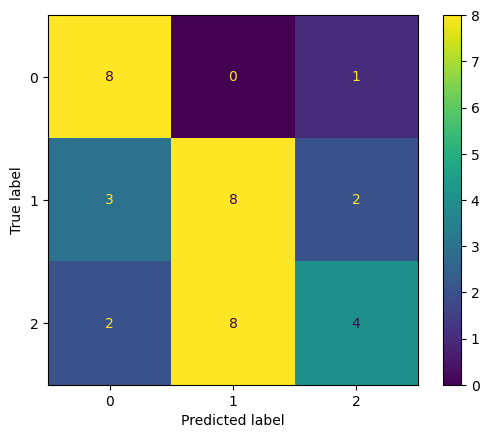

In [36]:
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Classifier Evaluation

In [37]:
def accuracy(ytest,ypred):
    accscore = (sum(abs(ytest-ypred))/len(ypred))
    return 1 - accscore

In [38]:
def myPrecision(y_test,y_pred):
    classes = np.unique(y_test)
    precision = np.zeros(classes.shape)

    C = confusion_matrix(y_test,y_pred)
    for i in classes:
        precision[i] = C[i,i] / sum(C[:,i])
    return precision

In [39]:
def myRecall(y_test,y_pred):
    classes = np.unique(y_pred)
    recall = np.zeros(classes.shape)
    C = confusion_matrix(y_test,y_pred)
    for i in classes:
        recall[i] = C[i,i] / sum(C[i,:])
    return recall

In [40]:
print('Classes: %s' % np.unique(y_pred))

Classes: [0 1 2]


In [41]:
print("Accuracy score: \n", accuracy(ytest,ypred)*100, "%")

Accuracy score: 
 47.22222222222222 %


In [42]:
print('Precision: %s' % myPrecision(y_test,y_pred))

Precision: [0.875      0.71428571 0.53846154]


In [43]:
print('Recall: %s' % myRecall(y_test,y_pred))

Recall: [0.875      0.45454545 0.77777778]
